![image](https://user-images.githubusercontent.com/57321948/196933065-4b16c235-f3b9-4391-9cfe-4affcec87c35.png)

# Submitted by: Mohammad Wasiq

## Email: `gl0427@myamu.ac.in`

# `News Articles Sorting`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import nltk
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import seaborn as sns
from pandas_profiling import ProfileReport


In [2]:
data = pd.read_csv('bbc.csv')

In [3]:
data.head()

,Unnamed: 0,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business


In [4]:
data['category_id'] = data['type'].factorize()[0]

In [5]:
colslist = ['Index', 'news', 'type', 'category_id']
data.columns = colslist

<AxesSubplot:xlabel='type'>

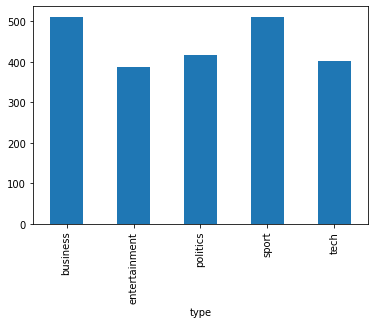

In [6]:
data.groupby('type').Index.count().plot.bar(ylim=0)

In [7]:
data.sample(5, random_state=0)

,Index,news,type,category_id
384,384,World leaders gather to face uncertainty\n \n ...,business,0
1983,1983,IBM puts cash behind Linux push\n \n IBM is sp...,tech,4
985,985,New rules tackle 'sham weddings'\n \n New rule...,politics,2
1386,1386,Double injury blow strikes Wales\n \n Wales ce...,sport,3
1294,1294,Bid to cut court witness stress\n \n New targe...,politics,2


In [8]:
#stop word removal
stopwords = nltk.corpus.stopwords.words('english')

In [9]:
data['news_without_stopwords'] = data['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [10]:
print(len(data['news_without_stopwords'][0]))

1549


In [11]:
print(data['news_without_stopwords'])

0       UK economy facing 'major risks' The UK manufac...
1       Aids climate top Davos agenda Climate change f...
2       Asian quake hits European shares Shares Europe...
3       India power shares jump debut Shares India's l...
4       Lacroix label bought US firm Luxury goods grou...
                              ...                        
2220    Warning Windows Word files Writing Microsoft W...
2221    Fast lifts rise record books Two high-speed li...
2222    Nintendo adds media playing DS Nintendo releas...
2223    Fast moving phone viruses appear Security firm...
2224    Hacker threat Apple's iTunes Users Apple's mus...
Name: news_without_stopwords, Length: 2225, dtype: object


In [12]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
pf = ProfileReport(data)

In [14]:
pf.to_file('test.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
#Porter Stemming
ps = PorterStemmer()

In [16]:
data['news_porter_stemmed'] = data['news_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [17]:
print(data['news_without_stopwords'][0])

UK economy facing 'major risks' The UK manufacturing sector continue face "serious challenges" next two years, British Chamber Commerce (BCC) said. The group's quarterly survey companies found exports picked last three months 2004 best levels eight years. The rise came despite exchange rates cited major concern. However, BCC found whole UK economy still faced "major risks" warned growth set slow. It recently forecast economic growth slow 3% 2004 little 2.5% 2005 2006. Manufacturers' domestic sales growth fell back slightly quarter, survey 5,196 firms found. Employment manufacturing also fell job expectations lowest level year. "Despite positive news export sector, worrying signs manufacturing," BCC said. "These results reinforce concern sector's persistent inability sustain recovery." The outlook service sector "uncertain" despite increase exports orders quarter, BCC noted. The BCC found confidence increased quarter across manufacturing service sectors although overall failed reach lev

In [18]:
print(data['news_porter_stemmed'][0])

uk economi face 'major risks' the uk manufactur sector continu face "seriou challenges" next two years, british chamber commerc (bcc) said. the group' quarterli survey compani found export pick last three month 2004 best level eight years. the rise came despit exchang rate cite major concern. however, bcc found whole uk economi still face "major risks" warn growth set slow. it recent forecast econom growth slow 3% 2004 littl 2.5% 2005 2006. manufacturers' domest sale growth fell back slightli quarter, survey 5,196 firm found. employ manufactur also fell job expect lowest level year. "despit posit news export sector, worri sign manufacturing," bcc said. "these result reinforc concern sector' persist inabl sustain recovery." the outlook servic sector "uncertain" despit increas export order quarter, bcc noted. the bcc found confid increas quarter across manufactur servic sector although overal fail reach level start 2004. the reduc threat interest rate increas contribut improv confidence,

In [19]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
data['news_porter_stemmed'][0]

'uk economi face \'major risks\' the uk manufactur sector continu face "seriou challenges" next two years, british chamber commerc (bcc) said. the group\' quarterli survey compani found export pick last three month 2004 best level eight years. the rise came despit exchang rate cite major concern. however, bcc found whole uk economi still face "major risks" warn growth set slow. it recent forecast econom growth slow 3% 2004 littl 2.5% 2005 2006. manufacturers\' domest sale growth fell back slightli quarter, survey 5,196 firm found. employ manufactur also fell job expect lowest level year. "despit posit news export sector, worri sign manufacturing," bcc said. "these result reinforc concern sector\' persist inabl sustain recovery." the outlook servic sector "uncertain" despit increas export order quarter, bcc noted. the bcc found confid increas quarter across manufactur servic sector although overal fail reach level start 2004. the reduc threat interest rate increas contribut improv confi

In [20]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].str.replace('[^\w\s]','')
data['news_porter_stemmed'][0]

C:\Users\Nasika NS\AppData\Local\Temp\ipykernel_2656\1145745800.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['news_porter_stemmed'] = data['news_porter_stemmed'].str.replace('[^\w\s]','')


'uk economi face major risks the uk manufactur sector continu face seriou challenges next two years british chamber commerc bcc said the group quarterli survey compani found export pick last three month 2004 best level eight years the rise came despit exchang rate cite major concern however bcc found whole uk economi still face major risks warn growth set slow it recent forecast econom growth slow 3 2004 littl 25 2005 2006 manufacturers domest sale growth fell back slightli quarter survey 5196 firm found employ manufactur also fell job expect lowest level year despit posit news export sector worri sign manufacturing bcc said these result reinforc concern sector persist inabl sustain recovery the outlook servic sector uncertain despit increas export order quarter bcc noted the bcc found confid increas quarter across manufactur servic sector although overal fail reach level start 2004 the reduc threat interest rate increas contribut improv confidence said the bank england rais interest r

In [21]:
freq = pd.Series(' '.join(data['news_porter_stemmed']).split()).value_counts()
freq.head()

the     8121
said    7253
i       3263
mr      3045
it      2701
dtype: int64

In [22]:
freq2 = freq[freq <= 3]
freq2

petrie        3
halfback      3
arteta        3
sibierski     3
unemployed    3
             ..
reconvened    1
megastar      1
grants        1
statefund     1
m3u           1
Length: 19554, dtype: int64

In [23]:
freq3 = list(freq2.index.values)
freq3

['petrie',
 'halfback',
 'arteta',
 'sibierski',
 'unemployed',
 'macki',
 '1954',
 'thie',
 'rauluni',
 'chaotic',
 'hines',
 'aesthetics',
 'article',
 'bahamas',
 'jungle',
 'partizan',
 'steadfastli',
 'liggett',
 'profess',
 'oncefam',
 'mc',
 'improvis',
 'cathi',
 'textual',
 'julio',
 'thinner',
 'olympian',
 'sititi',
 'lousi',
 'deflat',
 'mute',
 'satisfied',
 '194m',
 'pentathlon',
 'musampa',
 'splitcapit',
 'fledgl',
 'poet',
 'methodolog',
 'tonga',
 'doha',
 '1934',
 'lima',
 'imaging',
 'facility',
 'marston',
 'mondays',
 'lorillard',
 'duffy',
 'minis',
 'dawn',
 'nongovernment',
 '206bn',
 'appleton',
 'ugly',
 'suggestions',
 'fork',
 'emperor',
 'monfil',
 'butt',
 'sp2',
 'telephony',
 'blank',
 'torrid',
 'southwel',
 'slender',
 'aires',
 'plus',
 'carlsen',
 'neill',
 'og',
 'yearlong',
 'placed',
 'kgb',
 'garcialopez',
 'pelous',
 'wildcard',
 'welcome',
 'crucibl',
 'vicar',
 'sharpen',
 'copenhagen',
 'grimes',
 'schuettler',
 'transmission',
 'occasionall

In [ ]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq3)]))
data = data[['Index', 'type', 'category_id', 'news_porter_stemmed']]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [ ]:
features = tfidf.transform(data.news_porter_stemmed).toarray()
labels = data.category_id
features.shape

In [ ]:
data.columns = ['Index', 'newstype', 'category_id', 'news_porter_stemmed']

In [ ]:
category_id_df = data[['newstype', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'newstype']].values)

In [ ]:
from sklearn.feature_selection import chi2

N = 3
for newstype, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(newstype))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

In [ ]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).transform(features[indices])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

In [ ]:
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,size=8, jitter=True, edgecolor="gray", linewidth=2)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :16646].values
y = data.iloc[:, -1].values
model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model.transform(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.newstype.values, yticklabels=category_id_df.newstype.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
model.fit(features, labels)

In [ ]:
from sklearn.feature_selection import chi2

N = 5
for newstype, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(newstype))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

In [ ]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

In [ ]:
import pickle

In [ ]:
file = open('model.pkl', 'wb')

pickle.dump(model, file)
  